# Dursun Dashdamirov

### Loading libraries

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

from sklearn import ensemble, tree, linear_model
from sklearn.utils import estimator_html_repr
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from pipelinehelper import PipelineHelper
from sklearn.linear_model import Ridge
from sklearn.model_selection import StratifiedKFold


import missingno
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


from pipelinehelper import PipelineHelper
from IPython.display import Image
from IPython.core.display import HTML 

## Loading test and train data

In [59]:
test0 = pd.read_csv(r'C:\Users\admin\Downloads\test.csv')
train0 = pd.read_csv(r'C:\Users\admin\Downloads\train.csv')

In [60]:
train0.head(7)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000


In [61]:
test0.head(7)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal


In [62]:
print(test0.shape)
print(train0.shape)

(1459, 80)
(1460, 81)


In [63]:
train0.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [64]:
test0.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


## Data Cleaning 

### Checking datatypes

In [65]:
#train0.info() --> MSSubClass is int64
#test.info()

Some columns contain categorical info but have int64 type:

In [66]:
train1 = train0.copy()
test1 = test0.copy()


In [67]:
train1['MSSubClass'] = train1['MSSubClass'].astype(str)
test1['MSSubClass'] = test1['MSSubClass'].astype(str)

#### Missing value imputation for categrorical features

Checking categorical features to distinguish between Real 'Null' values and 'Null' values that actually depicts 'do not have'

In [68]:
# All the categorical columns that have more than 0 null value
train1.select_dtypes('object').loc[:, train1.isna().sum()>0].columns

Index(['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
       'Fence', 'MiscFeature'],
      dtype='object')

In [69]:
test1.select_dtypes('object').loc[:, test1.isna().sum()>0].columns

Index(['MSZoning', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType'],
      dtype='object')

#### The decision for imputation were made by analyzing the data description because of the fact that some "NULL" values was meant to indicate that that spesific thing (Fireplace, Pool and etc. ) does not exist in that house. Meanwhile, some "NULL" values indicate that data is missing.

In [70]:
# Imputing with constant-'None'
for column in ['Alley','BsmtQual', 
               'BsmtCond', 'BsmtExposure', 
               'BsmtFinType1','BsmtFinType2',
               'FireplaceQu', 'GarageType', 
               'GarageFinish', 'GarageQual', 
               'GarageCond', 'PoolQC', 'Fence',
               'MiscFeature'
               
              ]:
    train1[column] = train1[column].fillna("None")

#Imputing with mode
for column in ['MSZoning','Utilities',
               'Exterior1st', 'Exterior2nd',
               'MasVnrType', 'Electrical',
               'KitchenQual', 'Functional',
               'SaleType'
              ]:
    train1[column] = train1[column].fillna(train1[column].mode()[0])

In [71]:
# Imputing with constant-'None'
for column in ['Alley','BsmtQual', 
               'BsmtCond', 'BsmtExposure', 
               'BsmtFinType1','BsmtFinType2',
               'FireplaceQu', 'GarageType', 
               'GarageFinish', 'GarageQual', 
               'GarageCond', 'PoolQC', 'Fence',
               'MiscFeature'
               
              ]:
    test1[column] = test1[column].fillna("None")

#Imputing with mode
for column in ['MSZoning','Utilities',
               'Exterior1st', 'Exterior2nd',
               'MasVnrType', 'Electrical',
               'KitchenQual', 'Functional',
               'SaleType'
              ]:
    test1[column] = test1[column].fillna(test1[column].mode()[0])

In [72]:
train1.select_dtypes('object').loc[:, train1.isna().sum()>0].columns

Index([], dtype='object')

In [73]:
test1.select_dtypes('object').loc[:, test1.isna().sum()>0].columns

Index([], dtype='object')

#### Good, no missing values in categorical features

Checking numerical features:

In [74]:
train1.select_dtypes(np.number).loc[:, train1.isna().sum()>0].columns

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [75]:
test1.select_dtypes(np.number).loc[:, test1.isna().sum()>0].columns

Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea'],
      dtype='object')

In [76]:
test1.select_dtypes(np.number)

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,1464,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,1465,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,506.0,0,82,0,0,144,0,0,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,6,2006
1455,2916,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,286.0,0,24,0,0,0,0,0,4,2006
1456,2917,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,576.0,474,0,0,0,0,0,0,9,2006
1457,2918,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0.0,80,32,0,0,0,0,700,7,2006


In [77]:
train2 = train1.copy()
test2 = test1.copy()

### KNN Imputation for numerical missings:

In [78]:
def knn_impute(df, na_target):
    df = df.copy()
    
    numeric_df = df.select_dtypes(np.number)
    non_na_columns = numeric_df.loc[:, numeric_df.isna().sum() == 0].columns
    
    y_train = numeric_df.loc[numeric_df[na_target].isna()==False, na_target]
    X_train = numeric_df.loc[numeric_df[na_target].isna()==False, non_na_columns]
    X_test = numeric_df.loc[numeric_df[na_target].isna()==True, non_na_columns]
    
    knn = KNeighborsRegressor()
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    df.loc[df[na_target].isna()==True, na_target] = y_pred
    
    
    return df

In [79]:
for column in ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']:
       train2 = knn_impute(train2, column)

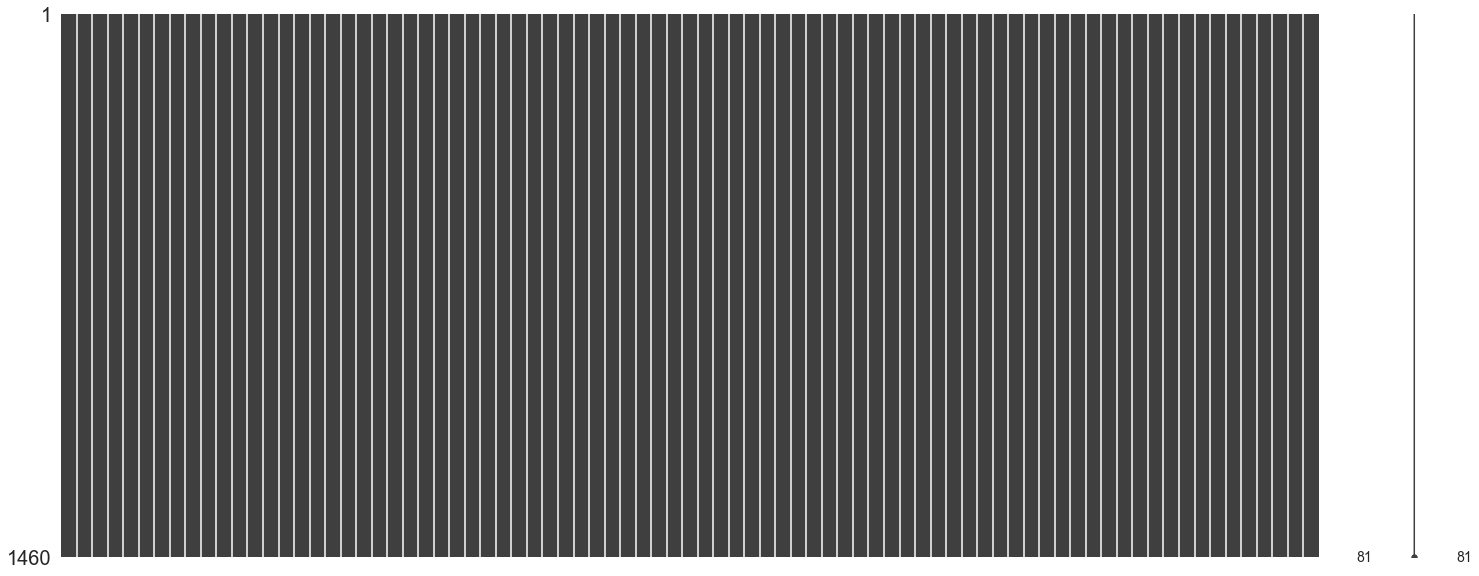

In [80]:
missingno.matrix(train2)

Again same steps for test:

In [81]:
for column in ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea']:
       test2 = knn_impute(test2, column)

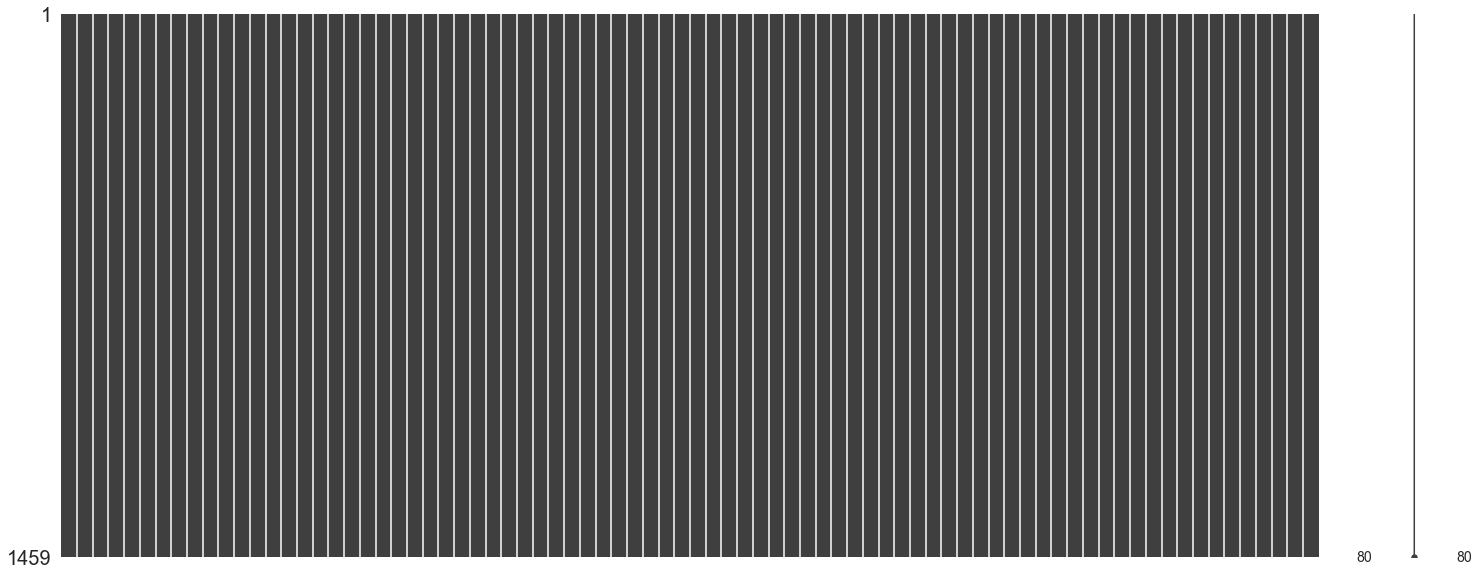

In [82]:
missingno.matrix(test2)

#### Impuuuted!

## Visualizations

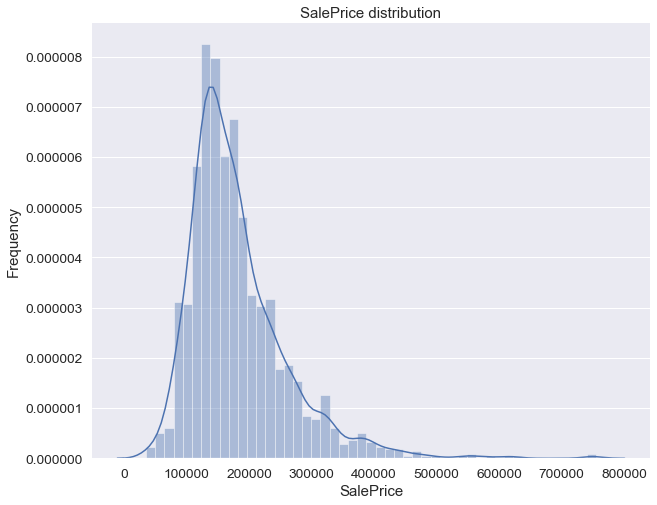

In [83]:
sns.set_style("darkgrid")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(10, 8))
sns.distplot(train2['SalePrice'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)
plt.show()

#### Before doing any feature engineering, Let's do some visualizations and get acquainted with data more deeply and choose columns that can be useful for prediction

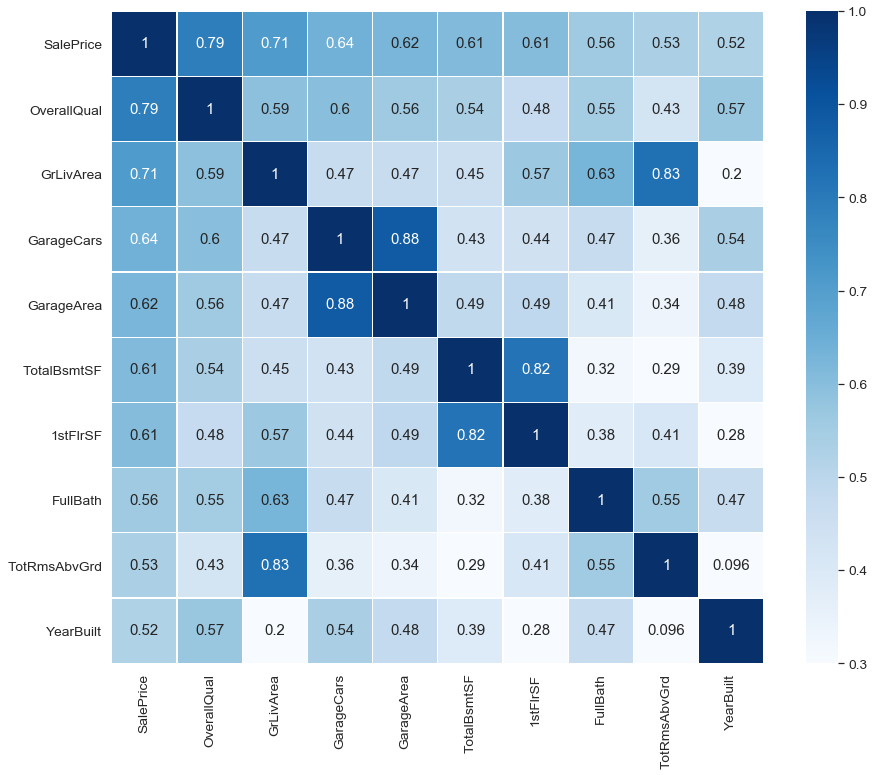

In [84]:
corrmat = train2.corr()
cols = corrmat.nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train2[cols].values.T)
plt.subplots(figsize=(15,12))
sns.set(font_scale=1.25)
sns.heatmap(cm, vmax=1,vmin=0.3, cmap="Blues",annot=True, square=True, linewidths=.2, yticklabels=cols.values,xticklabels=cols.values)

#### These 7-8 columns will be our numerical values for prediction.

##### ! We will not be using both GarageCars and GarageArea during prediction, main reason is Multicollinearity (high correlation between variables). 

### We will choose some categorical values after analyzing correlation(+seperation between categories) and data description file.

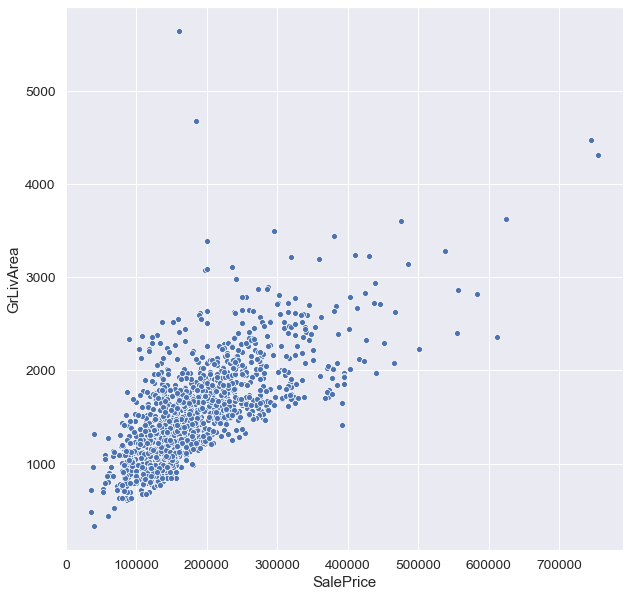

In [85]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(x='SalePrice', y='GrLivArea', data=train2)

### I will drop some outliers here before forgetting about them

In [86]:
train2.query('GrLivArea>4000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,None,IR1,Bnk,AllPub,...,0,None,None,None,0,10,2007,New,Partial,184750
691,692,60,RL,104.0,21535,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,None,IR1,Lvl,AllPub,...,555,Ex,MnPrv,None,0,7,2007,WD,Abnorml,745000
1298,1299,60,RL,313.0,63887,Pave,None,IR3,Bnk,AllPub,...,480,Gd,None,None,0,1,2008,New,Partial,160000


In [87]:
train2.query('GrLivArea<1500 & SalePrice>380000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
688,689,20,RL,60.0,8089,Pave,None,Reg,HLS,AllPub,...,0,None,None,None,0,10,2007,New,Partial,392000


In [88]:
train2.drop(train2[train2.GrLivArea > 5000].index, inplace=True)
train2.drop(train2[(train2.GrLivArea > 4000) & (train2.SalePrice<200000)].index, inplace=True)
train2.drop(train2[(train2.GrLivArea < 1500) & (train2.SalePrice>380000)].index, inplace=True)

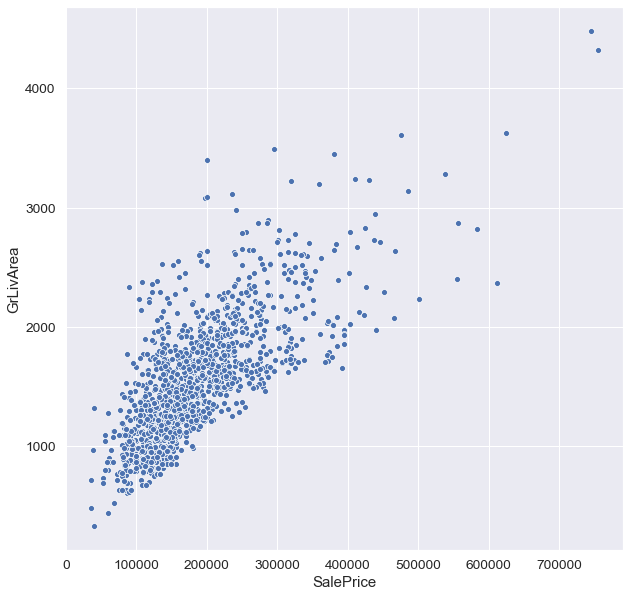

In [89]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(x='SalePrice', y='GrLivArea', data=train2)

# This seems better!

### Let's do some visualizations and see how our categorical variables are correlated with target variable:

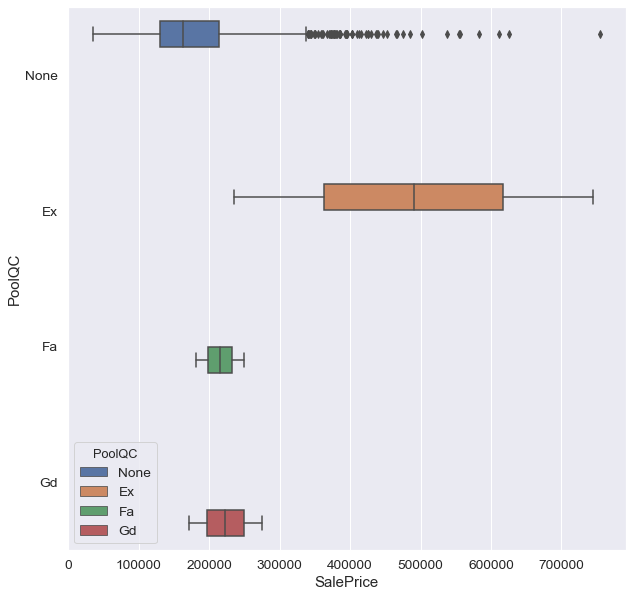

In [90]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.boxplot(x='SalePrice', y='PoolQC', data=train2,hue = "PoolQC")

Good, it seems we have some seperation between PoolQC categories.

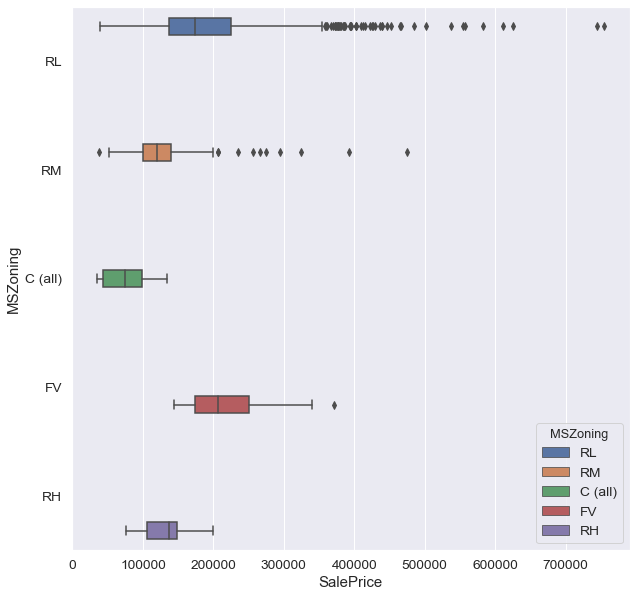

In [91]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.boxplot(x='SalePrice', y='MSZoning', data=train2,hue = "MSZoning")

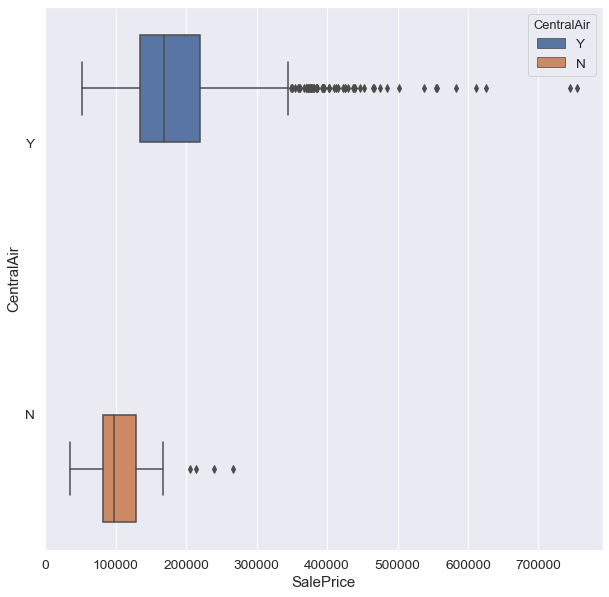

In [92]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.boxplot(x='SalePrice', y='CentralAir', data=train2,hue = "CentralAir")

We also have some good seperation in CentralAir variable, as expected, it affects the price.

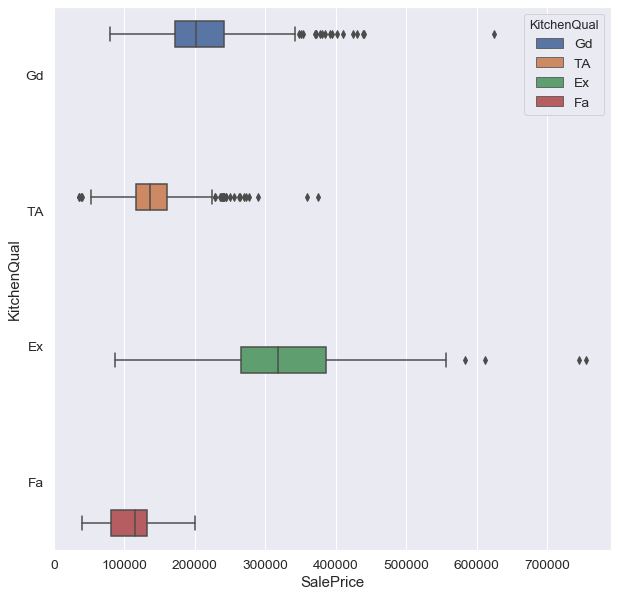

In [93]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.boxplot(x='SalePrice', y='KitchenQual', data=train2,hue = "KitchenQual")

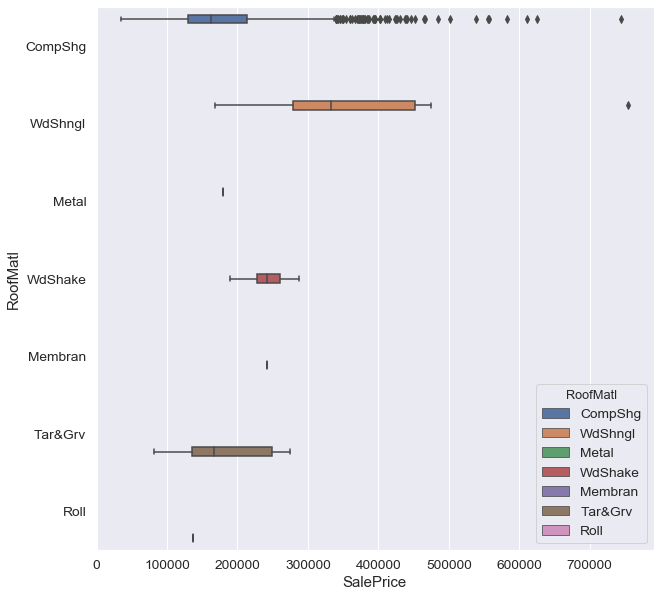

In [94]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.boxplot(x='SalePrice', y='RoofMatl', data=train2,hue = "RoofMatl")

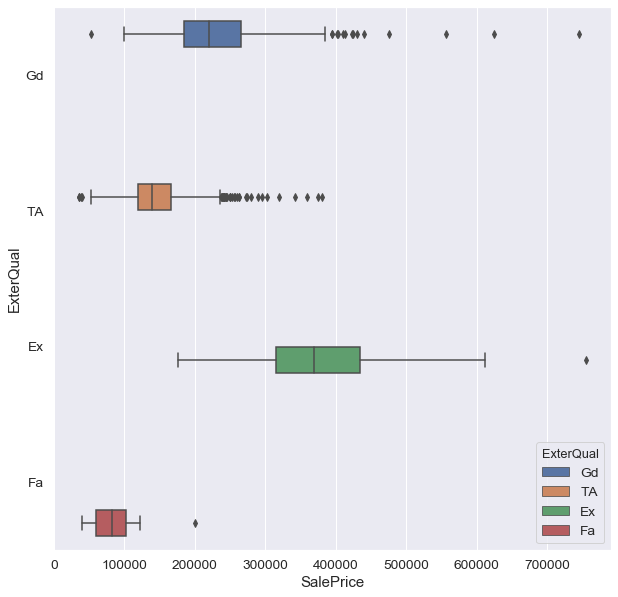

In [95]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.boxplot(x='SalePrice', y='ExterQual', data=train2,hue = "ExterQual")

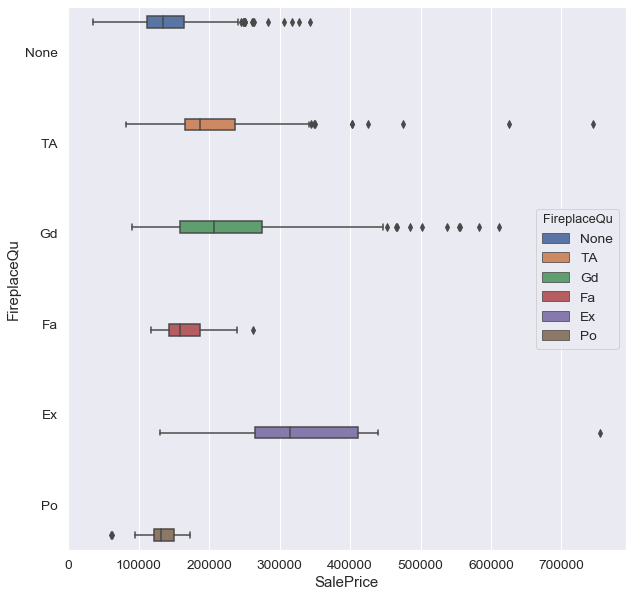

In [96]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.boxplot(x='SalePrice', y='FireplaceQu', data=train2,hue = "FireplaceQu")

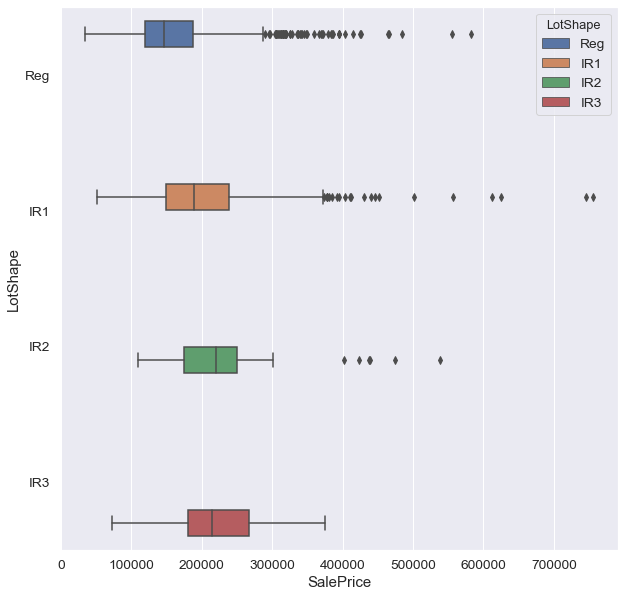

In [97]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.boxplot(x='SalePrice', y='LotShape', data=train2,hue = "LotShape")

After experimenting and visualizing the data, I decided using top 9 columns having highest correlation, and 6 categorical columns:

PoolQC, MSZoning, CentralAir, KitchenQual, RoofMatl, ExterQual 

In [98]:
train4 = train2[["Id",
"OverallQual","OverallCond","GrLivArea", "GarageArea", "TotalBsmtSF", "1stFlrSF", "FullBath", "TotRmsAbvGrd", 
    "PoolQC", "MSZoning", "CentralAir", "KitchenQual", "RoofMatl", "ExterQual","SalePrice","BsmtQual", "MSSubClass","Street","Neighborhood","HeatingQC"]]
test4 = test2[["Id",
"OverallQual","OverallCond","GrLivArea", "GarageArea", "TotalBsmtSF", "1stFlrSF", "FullBath", "TotRmsAbvGrd", 
    "PoolQC", "MSZoning", "CentralAir", "KitchenQual", "RoofMatl", "ExterQual","MSSubClass","BsmtQual","Street", "Neighborhood","HeatingQC"]]

In [99]:
train4.head()

,Id,OverallQual,OverallCond,GrLivArea,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,PoolQC,...,CentralAir,KitchenQual,RoofMatl,ExterQual,SalePrice,BsmtQual,MSSubClass,Street,Neighborhood,HeatingQC
0,1,7,5,1710,548,856,856,2,8,None,...,Y,Gd,CompShg,Gd,208500,Gd,60,Pave,CollgCr,Ex
1,2,6,8,1262,460,1262,1262,2,6,None,...,Y,TA,CompShg,TA,181500,Gd,20,Pave,Veenker,Ex
2,3,7,5,1786,608,920,920,2,6,None,...,Y,Gd,CompShg,Gd,223500,Gd,60,Pave,CollgCr,Ex
3,4,7,5,1717,642,756,961,1,7,None,...,Y,Gd,CompShg,TA,140000,TA,70,Pave,Crawfor,Gd
4,5,8,5,2198,836,1145,1145,2,9,None,...,Y,Gd,CompShg,Gd,250000,Gd,60,Pave,NoRidge,Ex


### Encoding and scaling with Pipeline

In [101]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error



In [102]:
X = train4.drop(['SalePrice','Id'], axis=1)
y = train4[['SalePrice']]

### Pipeline creation

In [186]:
numeric_transformer=Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer=Pipeline(steps=[
    ('one_hot_encoding', OneHotEncoder(handle_unknown='ignore'))
])

column_transformer=ColumnTransformer(transformers=[
    ('numeric', numeric_transformer, ["GrLivArea", "GarageArea", "TotalBsmtSF", "1stFlrSF", "FullBath", "TotRmsAbvGrd","OverallQual","OverallCond"]),
    ('categorical', categorical_transformer, ["MSZoning", "CentralAir", "KitchenQual", "RoofMatl", "ExterQual", "PoolQC","HeatingQC"])
])

model_pipeline=Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('regressor', PipelineHelper([
        ('knr', KNeighborsRegressor()),
        ('ls', Lasso()),
        ('rg', Ridge())
    ])),
])


HTML(estimator_html_repr(model_pipeline))

## Hyperparameter Optimization

The optimized hyperparameters are number of neighbors(closest n neghbors to take) and the approach of weighing the neighbors. In the case of uniform, the neighbors are weighted equally regardless of their distance to the point. Conversely, if we choose the distance based approach, the point that are closer will have higher importance. 

I have also added more regressors to choose the best algorithm for prediction. Each of the models also has its own hyperparameters such as alpha values(higher the alpha, more feature coefficients are zero).

In [154]:
params = {
    'regressor__selected_model': model_pipeline.named_steps['regressor'].generate({
        'knr__n_neighbors': [2,3,4,5,6,7,8,9,10,11,12,13],
        'knr__weights':['uniform', 'distance'],
        'ls__alpha': [1.0,1.1,1.2],
        'rg__alpha': [1.0,1.1,1.2,1.25,1.3],
        'rg__solver': ['auto', 'svd', 'cholesky', 'lsqr']
    })
}

kfold = KFold(n_splits=4, shuffle=True, random_state=42)

grid = GridSearchCV(model_pipeline, params, cv=kfold, scoring='r2')
grid.fit(X,y)
print(grid.best_params_)
print('-------------')
print(round((grid.best_score_),4))
print('-------------')
print(grid.cv_results_['mean_test_score'])


{'regressor__selected_model': ('knr', {'n_neighbors': 7, 'weights': 'distance'})}
-------------
0.8663
-------------
[0.83192571 0.83248602 0.84623849 0.84800495 0.85731333 0.85970862
 0.86007454 0.86297234 0.86058225 0.86468765 0.86169779 0.86629633
 0.85883428 0.86414768 0.85734614 0.86292249 0.85463003 0.86081544
 0.85265602 0.85904308 0.85221305 0.85857052 0.85066585 0.85740743
 0.84930705 0.84931195 0.84931571 0.84997697 0.84997697 0.84997697
 0.84991825 0.85000381 0.85000381 0.85000381 0.84994553 0.85002746
 0.85002746 0.85002746 0.84997017 0.85003821 0.85003821 0.85003821
 0.84998157 0.8500483  0.8500483  0.8500483  0.84996795]


# Prediction 

##### Let's do our prediction with best parameters and visualize the results of predicting to get better understanding of the accuracy

In [169]:
predict_pipeline=Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('regressor',KNeighborsRegressor(n_neighbors= 7, weights='distance'))
])

In [173]:
strtfdKFold = StratifiedKFold(n_splits=5)
kfold = strtfdKFold.split(X_train, y_train)
scores = []

for k, (train, test) in enumerate(kfold):
    predict_pipeline.fit(X_train.iloc[train, :], y_train.iloc[train])
    score = predict_pipeline.score(X_train.iloc[test, :], y_train.iloc[test])
    scores.append(score) 
print('\n\nCross-Validation accuracy: %.4f +/- %.3f' %(np.mean(scores), np.std(scores)))



Cross-Validation accuracy: 0.8594 +/- 0.026


In [174]:
predict_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['GrLivArea', 'GarageArea',
                                                   'TotalBsmtSF', '1stFlrSF',
                                                   'FullBath', 'TotRmsAbvGrd',
                                                   'OverallQual',
                                                   'OverallCond']),
                                                 ('categorical',
                                                  Pipeline(steps=[('one_hot_encoding',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['MSZoning', 'CentralAir',
                                

In [177]:
result = predict_pipeline.predict(X_test)
print(round(r2_score(y_test, result),4))

0.8525


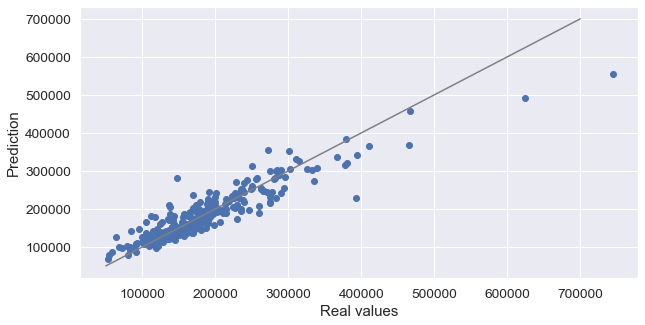

In [178]:
plt.figure(figsize=(10, 5))

plt.scatter(y_test, result,color='b')
plt.plot([50000,700000],[50000,700000], color='grey') # y=x line for better understanding

plt.xlabel('Real values')
plt.ylabel('Prediction')

plt.show()

## Final prediction

In [179]:
finalresult = predict_pipeline.predict(test4)

In [180]:
df = pd.DataFrame(finalresult)

In [181]:
pred_data=pd.DataFrame(finalresult,columns=['SalePrice'])
target_pred=pd.concat([test4['Id'],pred_data],axis=1)
target_pred.head()

,Id,SalePrice
0,1461,133219.966972
1,1462,147186.495881
2,1463,177379.878668
3,1464,198300.987974
4,1465,206513.985310


In [183]:
#target_pred.to_csv("submission.csv", index=False)
print("Submission was successfully saved!")

Submission was successfully saved!


### Prediction Results

Generally, the performance of model can be accepted as successful. It gave satisfactory result(RMSLE=0.16597) on test data set that model have never seen. Improvements can be defining more models(maybe averaging best predictors) and making GridSearch on them one more time. From Feature Enginneering perspective, we could choose categorical columns more appropriate(changed some of them already and got improvement). Lastly, with handling the outliers professionally(I haven't fully covered the topic yet), we can get better results. Thanks for your time! 